In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
filepath = 'C:\\Users\\User\\Desktop\\8º período\\DM\\TP1\\itemset_mining_applied_to_pokemon_teams\\'

team_df = pd.read_csv(filepath + 'data\\processed\\pokemon_teams.csv')

team_df.head()

,pokemon_1,pokemon_2,pokemon_3,pokemon_4,pokemon_5,pokemon_6
0,Landorus-Therian,Corviknight,Tapu Fini,Slowking-Galar,Volcarona,Dragapult
1,Hawlucha,Ninetales-Alola,Garchomp,Cloyster,Tapu Lele,Heatran
2,Kartana,Zapdos,Heatran,Landorus-Therian,Dragapult,Toxapex
3,Heatran,Melmetal,Tornadus-Therian,Landorus-Therian,Slowbro,Weavile
4,Diggersby,Shuckle,Dragonite,Blastoise,Tapu Koko,Aegislash


In [3]:
pokemons = team_df.stack().reset_index(drop=True)
pokemons_unicos = pd.Series([pokemon.lower() for pokemon in pokemons]).unique()

print(f'Existem {len(pokemons_unicos)} pokémons diferentes e {team_df.shape[0]} equipes no dataset!')

Existem 493 pokémons diferentes e 4340 equipes no dataset!


In [4]:
print(team_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pokemon_1  4340 non-null   object
 1   pokemon_2  4340 non-null   object
 2   pokemon_3  4340 non-null   object
 3   pokemon_4  4340 non-null   object
 4   pokemon_5  4340 non-null   object
 5   pokemon_6  4340 non-null   object
dtypes: object(6)
memory usage: 203.6+ KB
None


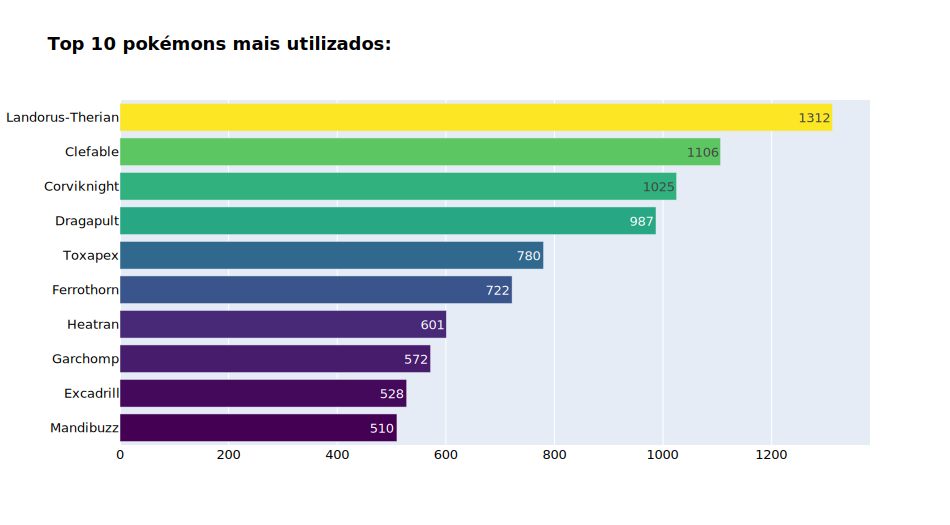

In [30]:
top10_mais_usados = pokemons.value_counts()[:10].sort_values()

fig = go.Figure(go.Bar(
            y=top10_mais_usados.index,
            x=top10_mais_usados.values,
            orientation='h',
            marker=dict(color = top10_mais_usados, colorscale='viridis'),
            hovertemplate='Usado %{x} vezes<extra></extra>',
            text=top10_mais_usados.values,
            textposition='auto'))
fig.update_layout(width=950,
                  height=525,
                  title_text="<b>Top 10 pokémons mais utilizados:<b>",
                  font_family="Century Gothic Medium",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13)

fig.show(renderer="svg")

Ao que parece, _Landorus-Therian_, _Clefable_ e _Corviknight_ são os pokémons mais populares nessa _tier_.